In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import library.timedomain as td
import library.fileprocessing as fp
import glob,sys
c = 299792458

# Process One Multisweep file

In [ ]:
#Process one multisweep file

F = fp.loadfile_frequency('../../phase_work/frequency.txt')
timestamps,phase_data = fp.loadfile_multisweep('../../phase_work/08-45-36.510483.txt')

delay1 = np.empty(0) 
delay2 = np.empty(0)
for data in phase_data:
    temp_delay1,temp_delay2,temp1,temp2 = td.transform(F,data,overs=1000)
    delay1 = np.append(delay1,temp_delay1)
    delay2 = np.append(delay2,temp_delay2)

# Process File with Reduced data
    
    

In [11]:
#Process Reduced data results file

timestamps = np.empty(0)
delay1 = np.empty(0)
delay2 = np.empty(0)
height1 = np.empty(0)
height2 = np.empty(0)
data = np.loadtxt('data.csv',dtype='float',delimiter=',',skiprows=1)
timestamps = data[:,0];delay1 = data[:,1];height1 = data[:,2];delay2 = data[:,3];height2 = data[:,4]
timestamps_offset = timestamps - min(timestamps)

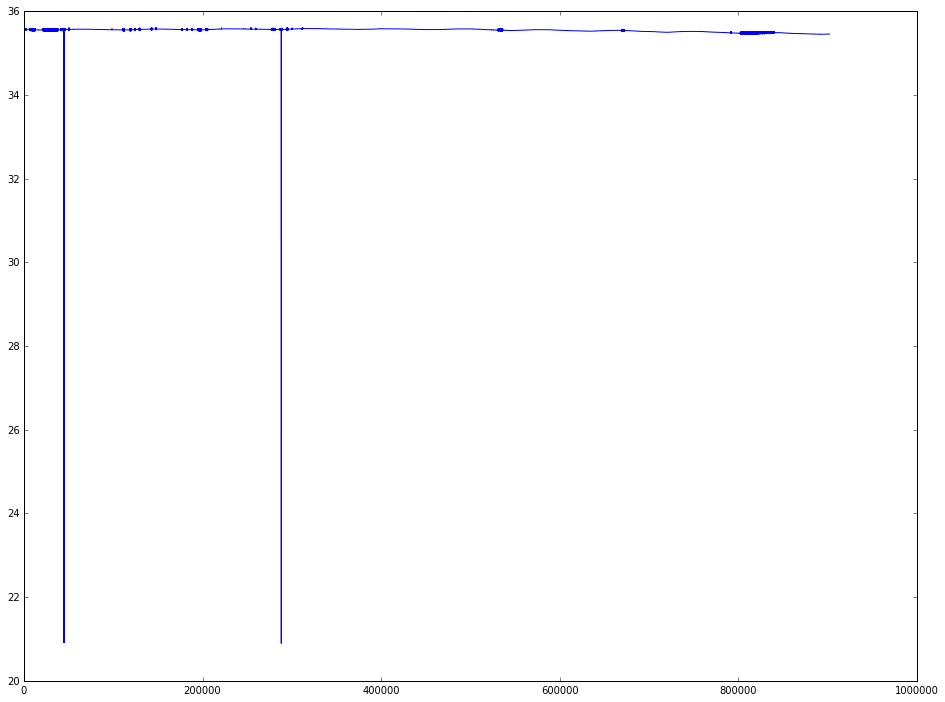

In [27]:
plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,delay1,'b')

In [54]:
#Determine indices where amplitude heights of pulses swopped position and make those points equal to mean delay
#This is an artifact of the peak detection code. 
#Peak detection code algorithm uses pulse amplitude to determine first and second peaks

temp_delay1 = np.copy(delay1)
temp_delay2 = np.copy(delay2)
indices = []
counter = 0
threshold = 2
for i in range(len(delay2)-1):
    if np.abs(delay2[i+1]-delay2[i]) > threshold:
        indices.append(i)
        counter+=1        
print counter
temp_delay1[indices] = np.mean(delay1) 
temp_delay2[indices] = np.mean(delay2) 

6


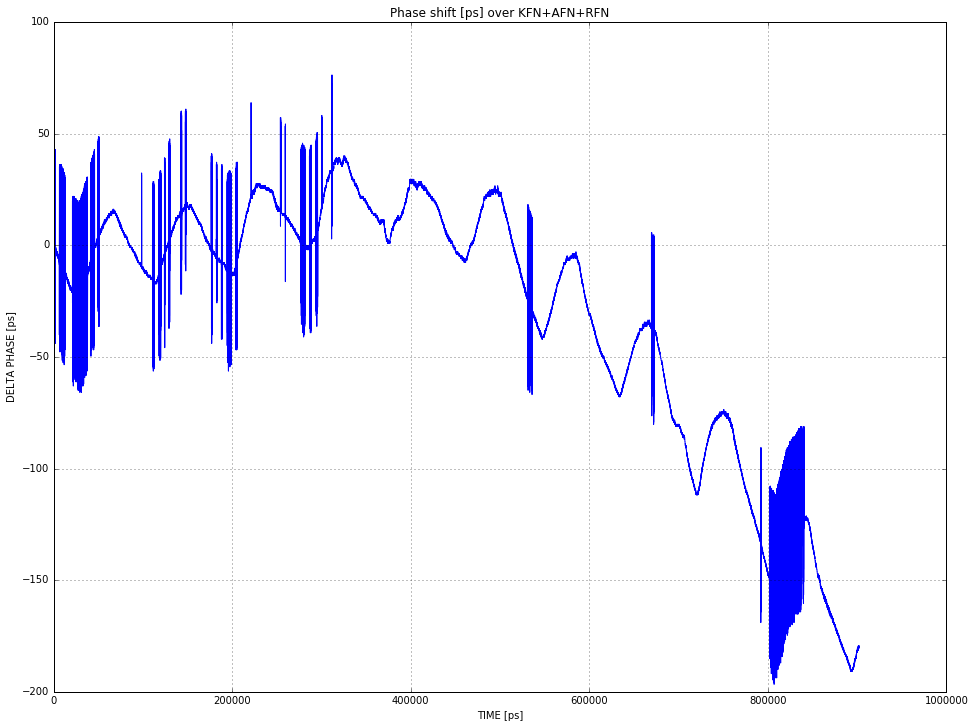

In [65]:
#Plot Delta delay of First peak of data
#This is with data where few out of order peaks were rearranged

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,0.5*(temp_delay1-temp_delay1[0])/c*1e12)
plt.title('Phase shift [ps] over KFN+AFN+RFN')
plt.xlabel('TIME [ps]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

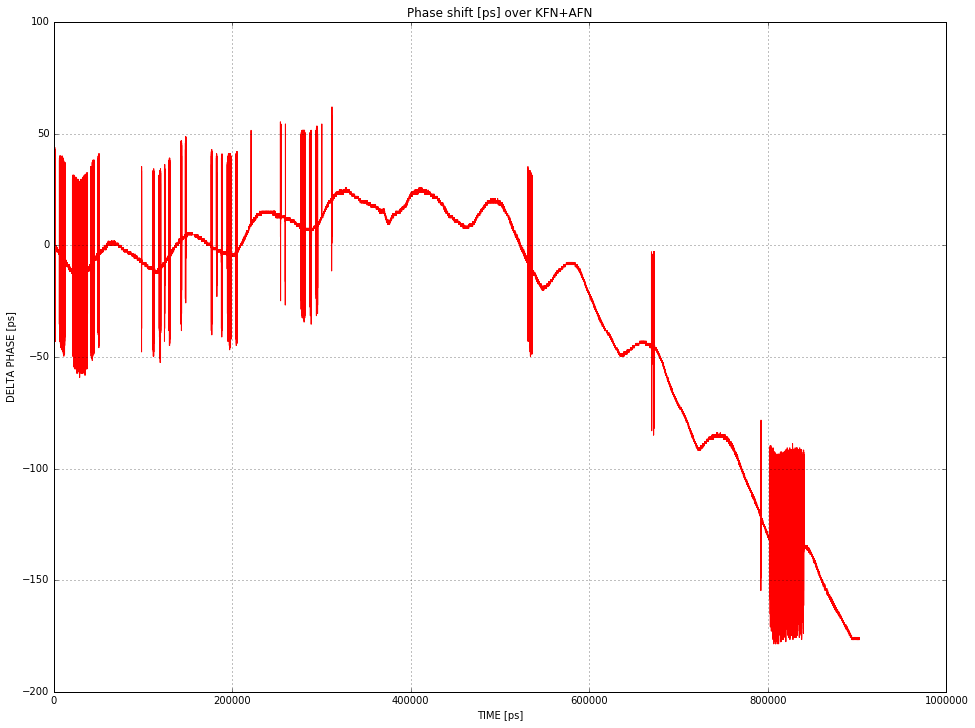

In [67]:
#Plot Delta delay of Second peak
#This is with data where few out of order peaks were rearranged

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,0.5*(temp_delay2-temp_delay2[0])/c*1e12,'r')
plt.title('Phase shift [ps] over KFN+AFN')
plt.xlabel('TIME [ps]'); plt.ylabel('DELTA PHASE [ps]')
plt.grid(True)

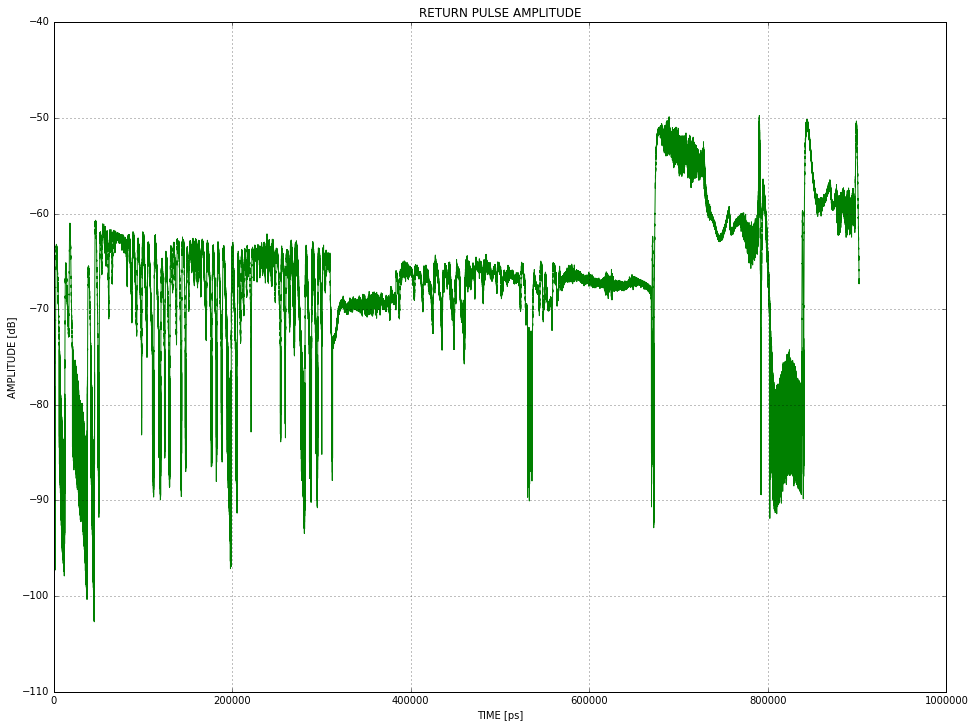

In [68]:
#Plot Amplitude of First peak

plt.figure(figsize=(16,12))
plt.plot(timestamps_offset,height1,'g')
plt.title('RETURN PULSE AMPLITUDE')
plt.xlabel('TIME [ps]'); plt.ylabel('AMPLITUDE [dB]')
plt.grid(True)